In [1]:
import sys
import os
import yaml

# Add src directory to sys.path for imports
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src")))

# Now you can import your class
from usgsgaugekrig import USGSLoader, USGSKrig

In [2]:
# Load the config from the configs directory
config_path = os.path.abspath(os.path.join(os.getcwd(), "..", "configs/usgsgaugekrig.yaml"))

loader = USGSLoader(config_path)

# Get discharge data for a specific date
year, month, day = 1982, 12, 10
data = loader.get_streamflow(year, month, day)

/Users/jmframe/qkrig_usgs/data/list_22_camels_basins_NoLeaf.txt

Summary for 1982-12-10
  - Observations: 7
  - Min: 1.21, Max: 25.14, Mean: 11.01


In [3]:
# Initialize kriging analysis
krig = USGSKrig(data, config_path, year, month, day)

In [4]:
# Compute kriging first
krig.compute_kriging()

Computing Kriging using spherical variogram model...


/Users/jmframe/qkrig_usgs/src/usgsgaugekrig.py:232: RuntimeWarning: Mean of empty slice.
  semi_variance = [differences[bin_indices == i].mean() for i in range(self.variogram_bins)]
/Users/jmframe/miniconda3/envs/qkrig/lib/python3.10/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


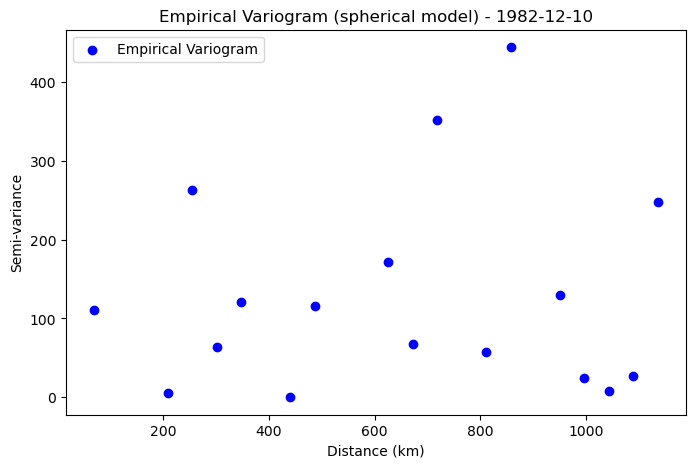

In [5]:
# Plot the variogram
krig.plot_variogram()

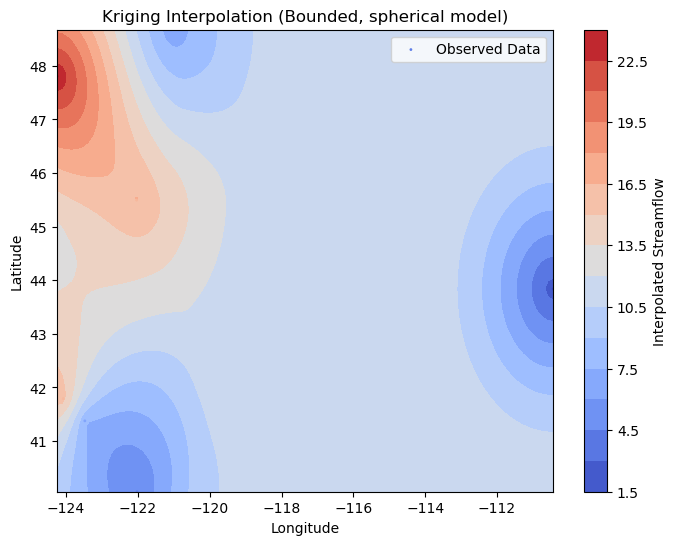

In [6]:
# Generate the kriging interpolation map
krig.map_krig_interpolation()

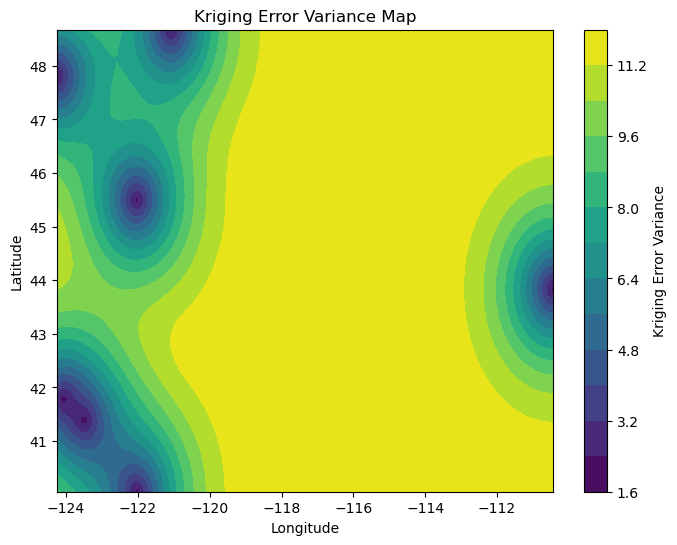

In [7]:
# Generate the kriging error variance map
krig.map_krig_error_variance()